**Tydzień 1 - Numpy (ale najpierw listy)**

In [1]:
import numpy as np

In [2]:
x = np.arange(10).reshape((2, 5))

In [3]:
y = x.reshape((5,2))

In [4]:
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [5]:
y[0] = 12

In [6]:
y

array([[12, 12],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9]])

In [7]:
x

array([[12, 12,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

Podstawą wszystkich obliczeń na komputerze są... liczby.
Rzadko kiedy operujemy jednak na pojedynczych liczbach, z reguły pracujemy na całych tablicach/wektorach liczb.
Do tego właśnie służy `numpy`.

Ktoś mógłby zapytać _co złego jest w wbudowanym typie `list`_.
Zacznijmy od przyjrzenia mu się bliżej.

## Listy przypomnienie

### Tworzenie listy

In [8]:
l = [1, 2, 3] 
l

[1, 2, 3]

In [9]:
type(l), l[0], l[-1], len(l), sum(l)

(list, 1, 3, 3, 6)

Lista może mieć w sobie elementy różnych typów: 

In [10]:
l2 = [1, "a", "0"]

Indeksowanie elementów listy

In [11]:
l2[0], l2[:], l2[-1]

(1, [1, 'a', '0'], '0')

Z racji, że w liście są elementy które nie wiadomo jak do siebie dodać to `sum(l2)` _rzuci_ błędem.

In [12]:
sum(l2)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Dodatkowa uwaga.
(Choć nie powinniśmy) to python pozwoli zrobić `sum([1, 2.5, 3j])`, czyli policzyć sumę listy złożonej z elementów różnych typów.

In [13]:
l3 = [1, 2.5, 3j]
for e in l3:
    print(f"Element {e} jest typu {type(e)}")
sum(l3)


Element 1 jest typu <class 'int'>
Element 2.5 jest typu <class 'float'>
Element 3j jest typu <class 'complex'>


(3.5+3j)

Warto pamiętać, że pomnożenie listy przez liczbę `int` powiela listę.

In [14]:
[0] * 5

[0, 0, 0, 0, 0]

In [15]:
[1, 2, 3] * 4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

W tym przypadku warto zauważyć pewną subtelność, która może powodować problemy w przyszłości.
Elementami powiększonej listy będę _płytkie kopie_ elementów.

Przykład więcej pokaże:

In [16]:
ll = [[]] * 3  # lista z trzema pustymi listami
ll

[[], [], []]

In [17]:
ll[0].append(42)  # do pierwszej listy dodajemy 42
ll[0]

[42]

In [18]:
ll  # okazuje się, że wszystkie listy to tak naprawdę ta sama lista!

[[42], [42], [42]]

W tym kontekście polecam zapoznać się z tymi dwoma wątkami na Stack Overflow:

- [least-astonishment-and-the-mutable-default-argument](https://stackoverflow.com/questions/1132941/least-astonishment-and-the-mutable-default-argument)
- [what-is-the-pythonic-way-to-avoid-default-parameters-that-are-empty-lists](https://stackoverflow.com/questions/366422/what-is-the-pythonic-way-to-avoid-default-parameters-that-are-empty-lists)

### Iterowanie po liście

In [19]:
print(l)

for e in l:
    print(e**2)

[1, 2, 3]
1
4
9


In [20]:
for i, e in enumerate(l):
    print(i, e**2)

0 1
1 4
2 9


Warto zaprzyjaźniać się z _list comprehension_, jest niezwykle przydatne.

In [21]:
l3 = [i**2 for i in range(10)]
l3

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Indeksowanie listy

Elementy od trzeciego do końca listy

In [22]:
l3[2:]

[4, 9, 16, 25, 36, 49, 64, 81]

Elementy o indeksach od dwa (włącznie) do trzy (wyłącznie).
Warto zwrócić uwagę, że ponieważ indeksowanie `l[i:j]` zwraca listę to dostajemy **listę** jedno elementową, a nie pojedynczy element `l3[2]`.

In [23]:
l3[2:3]

[4]

W pythonie istnieją indeksy ujemne, idą od końca.
W tym przypadku dostaniemy całą listę oprócz ostatniego elementu.

In [24]:
l3[:-1]

[0, 1, 4, 9, 16, 25, 36, 49, 64]

Warto pomijać redundantne indeksy jak w przypadku poniżej gdzie chcemy wziąć elementy o indeksach mniejszych od 4.

In [25]:
l3[0:4] == l3[:4]

True

Domyśle indeksowanie pozwala również na branie co któregoś elementu oraz na odwracanie listy.

In [26]:
l3[::2]

[0, 4, 16, 36, 64]

In [27]:
l3[3:8:2]  # Od elementu o indeksie do elementu o indeksie mniejszym od 8, co dwa czyli indeksy 3, 5, 7

[9, 25, 49]

In [28]:
l3[::-1]  # Wszystkie elementy co -1 czyli odwrócenie listy.

[81, 64, 49, 36, 25, 16, 9, 4, 1, 0]

## Numpy

Przypomnieliśmy sobie działanie list w pythonie.
W numpy'u podstawową _jednostką_ na jakiej będziemy operować jest `np.ndarray`, czyli _n-dimensional array_.
Możemy więc myśleć o `ndarray`'u jak o n-wymiarowej tablicy/wektorze.
Dla $n=1$ będzie to wektor, a dla $n=2$ macierz.
W ogólności takie twory nazywane są z reguły **tensorami**, ale my będziemy nazywać je arrayami, bo z tą nazwą spotkacie się częściej.

Za każdym razem gdy masz jakiś problem, zanim napiszesz na Slacku, pogoogluj. Prawdopodobnie na stack'u (StackOverflow) ktoś już miał to pytanie...
Przykładowe frazy do googla:

- _concat array horizontally numpy_
- _reverse sort numpy_
- _add dimension in front numpy_
- _zeros bool array numba_


### Podstawowe tworzenie i indeksowanie array'i

Na początku zobaczymy, że wszystko co znamy z list tutaj również zadziała.

[Dodatkowo patrz tworzenie array'i](https://numpy.org/doc/stable/user/basics.creation.html)

![](images/import_numpy.png)

In [29]:
import numpy as np

In [30]:
x = np.array([1, 2, 3])  # w ten sposób tworzymy array na podstawie pythonowej listy
x

array([1, 2, 3])

In [31]:
x[0], x[-1], len(x)

(1, 3, 3)

In [32]:
x[1:]

array([2, 3])

In [33]:
x[2:]

array([3])

In [34]:
x[::-1]

array([3, 2, 1])

In [35]:
3 in x

True

### Przydatne pola

Array ma też kilka przydatnych pól:

In [36]:
x.dtype, x.ndim  # typ danych w array'u oraz liczba wymiarów

(dtype('int32'), 1)

In [37]:
# ilość elementów listy w każdym z wymiarów
# zwróć uwagę, że jest to krotka jednoelementowa
x.shape

(3,)

### Przypadek wielowymiarowy

Teraz stwórzmy array dwuwymiarowy przez wykorzystanie funkcji [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html). 

In [38]:
lr = list(range(12))
a = np.array(lr)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Zwróć uwagę, że docelowe wymiary podajemy jako krotkę

In [39]:
a2 = a.reshape((3, 4))
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Wywołanie metody `reshape` na `a` nie zmienia go:

In [40]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [41]:
a2[0, :]  # pierwszy wiersz

array([0, 1, 2, 3])

In [42]:
a2[0, :]  # pierwsza kolumna

array([0, 1, 2, 3])

In [43]:
a2[2, 3]  # Element z 3-go wiersza i 4-tej kolumny

11

In [44]:
a2[:, ::2]  # wszystkie wiersze i co druga kolumna

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [45]:
a2[:, 1::2]  # wszystkie wiersze i co druga kolumna od tej o indeksie 1

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

### Typowe sposoby tworzenia array'i

W praktyce rzadko kiedy tworzymy array'e z list pythonowych, bo to oznacza, że najpierw musimy stworzyć listę, żeby dopiero później zamienić ją na array.

Teraz poznamy najczęściej używane funkcje do tworzenia array'i.

In [46]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [47]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [48]:
np.arange(10)  # zwróć uwagę, że w ostatnia liczba jest mniejsza od 10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
np.arange(10).reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
np.arange(2, 10, 3)  # od, do, co ile

array([2, 5, 8])

In [51]:
np.linspace(0, 5)  # koniec jest również _włączony_

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [52]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [53]:
np.array([1, 2, 3]).repeat(3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [54]:
np.tile(np.array([1, 2, 3]), 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [55]:
np.random.rand(10)  # 10 liczb losowych z przedziału [0, 1)

array([0.0937669 , 0.84341194, 0.39200927, 0.56079913, 0.94195183,
       0.20836819, 0.55401533, 0.94823213, 0.81617803, 0.56100777])

### Typy elementów w array'u

Choć nie padło to jeszcze wprost to widać, że wszystkie elementy array'a **są tego samego typu**, a przez to zajmuje tyle samo miejsca na dysku.
Jeżeli bardzo się postaramy to może to być najogólniejszy typ `object`, który trzyma referencje do obiektów, ale z reguły oznacza to, że gdzieś popełniliśmy błąd, przykład niżej.

Poniżej przykłady jak zmieniać typ array'a bądź wybrać go przy tworzeniu. Z reguły domyślnie jest to `int`, bądź `float`.
Kropeczka przy liczbie zawsze oznacza zmiennoprzecinkowość.

[Patrz dtype, czyli data types](https://numpy.org/doc/stable/user/basics.types.html)

In [56]:
(np.zeros(3), 
np.zeros(3, dtype=int), 
np.zeros(3, dtype=bool), 
np.zeros(3, dtype=np.uint16), 
np.zeros(3, dtype=complex))

(array([0., 0., 0.]),
 array([0, 0, 0]),
 array([False, False, False]),
 array([0, 0, 0], dtype=uint16),
 array([0.+0.j, 0.+0.j, 0.+0.j]))

In [57]:
x = np.zeros(3)
x[0] = 12
x[2] = -1
x.astype(np.float16)

array([12.,  0., -1.], dtype=float16)

Znowu, oryginalny `x` nie został zmodyfikowany.

In [58]:
x

array([12.,  0., -1.])

Zwróć uwagę, że takie działanie może powodować [klasyczny overflow](https://pl.wikipedia.org/wiki/Przekroczenie_zakresu_liczb_ca%C5%82kowitych)!

In [59]:
x.astype(np.uint8)

array([ 12,   0, 255], dtype=uint8)

In [60]:
x = np.array([1e100])
x, x.astype(np.float16)

(array([1.e+100]), array([inf], dtype=float16))

In [61]:
np.array(["ala", 2, int])

array(['ala', 2, <class 'int'>], dtype=object)

### Nibyliczby specjalne

Warto wiedzieć, że taki powyższy `np.inf` (ang. infinity) też jest liczbą tylko specjalną.
Oprócz niego jest jeszcze `np.nan` czyli _not a number_.
W ogólności jest to część standardu IEEE 754 mówiącego o tym jak powinny zachowywać się liczby zmiennoprzecinkowe. Takie same zachowania dostaniesz w każdym innym języku programowania (no tak mniej więcej).

In [62]:
a = np.inf
a, a*5, a-4, a*0, -a, a+2, a-a

(inf, inf, inf, nan, -inf, inf, nan)

**Uwaga!!!** Nan nanowi nie równy

[Tu miał być mem z kaszką NAN ale nes*** nie wyszło z rosji]

In [63]:
np.nan == np.nan, np.nan != np.nan, np.nan < np.nan, np.nan >= np.nan

(False, True, False, False)

### Array'e z napisami

Przykład poniżej. Zwróć uwagę, na `dtype='<U4'`. Oznacza to stringa o długości 4 lub mniej.
Oznacza to, że każdy element array'a zabiera tyle miejsca co string o długości 4.
Z reguły jest to pożądane, bo na takich obiektach dobrze się komputerowi operuje, ale czasem gdy będziemy array stringów o długości 2-5 z jednym o długości 10000 znaków, wszystkie zaczną zajmować tyle miejsca co najdłuższy!!!

In [64]:
vala = np.array(["Ala", "ma", "kota"])
vala

array(['Ala', 'ma', 'kota'], dtype='<U4')

In [65]:
# Tylko ostatni element jest inny
vala1 = np.array(["Ala", "ma", "kota"] * 100)
vala2 = np.array(["Ala", "ma", "kota"] * 99 + ["Ala", "ma", "kotaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"])
np.array_equal(vala1[:-1], vala2[:-1]), vala1[-1] == vala2[-1]

(True, False)

Rozmiar pojedynczego elementu oraz rozmiar całej tablicy w pamięci:

In [66]:
vala1.itemsize, vala1.itemsize * vala1.size

(16, 4800)

In [67]:
vala2.itemsize, vala2.itemsize * vala2.size

(128, 38400)

In [68]:
38400 / 4800

8.0

Drugi array zajmuje 8 razy więcej miejsca, mimo różnicy tylko w jednym elemencie!

### Operacje na array'ach

Ok, umiemy tworzyć i indeksować array'e, ale po co?
Otóż żeby coś na nich liczyć!

To co odróżnia array'e od list to ich **zwektoryzowanie**!
To oznacza, że zapominamy o pętlach i od teraz dokonujemy operacji na całych array'ach!


In [69]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [70]:
x * 2

array([0, 2, 4, 6])

In [71]:
x ** 2

array([0, 1, 4, 9], dtype=int32)

In [72]:
np.sin(x)

array([0.        , 0.84147098, 0.90929743, 0.14112001])

Co ważne (z punktu widzenia wydajności) to array'e numpy'owe _żyją_ jako tablice w C.
Wykonanie operacji `y = x * 2` oznacza wymnożenie tablicy przez 2 w C i dopiero później przekazanie wyniku do pythona.

Dzięki temu numpy jest równie szybki jakby napisać:

```c
int x[10];
int y[10];
for (int i=0; i<10; i++)
    x[i] = i;
for (int i=0; i<10; i++)
    y[i] = x[i] * 2;
```

Tylko _troszkę_ bardziej przyjemny w obsłudze :)

![](images/cpp_numpy.jpg)

![](images/behind_scenes.webp)

In [73]:
y = np.array([4, 1, 2, 1])
x, y

(array([0, 1, 2, 3]), array([4, 1, 2, 1]))

Mnożenie element po elemencie dwóch wektorów jest bajecznie proste:

In [74]:
x*y, x/y, x+y, x-y

(array([0, 1, 4, 3]),
 array([0., 1., 1., 3.]),
 array([4, 2, 4, 4]),
 array([-4,  0,  0,  2]))

In [75]:
x % 2  # reszta z dzielenia przez 2

array([0, 1, 0, 1], dtype=int32)

Podobnie jak zadanie

> Dla wektorów x i y znajdź maksymalną wartość kwadratu sinusa ich iloczynu element po elemencie

In [76]:
z1 = x * y  # iloczyn element po elemencie
z2 = np.sin(z1)  # sinus iloczynu
z3 = z2 ** 2  # jego kwadrat
z4 = np.max(z3)  # maksymalny element array'a
z4

0.7080734182735712

Oczywiście można to zrobić w jednej linijce

In [77]:
(np.sin(x * y) ** 2).max()

0.7080734182735712

### Operacje logiczne

Podobnie jak powyżej, te też są zwektoryzowane!

In [78]:
x, x > 1

(array([0, 1, 2, 3]), array([False, False,  True,  True]))

In [79]:
x != 1

array([ True, False,  True,  True])

In [80]:
x == 3

array([False, False, False,  True])

In [81]:
xb1 = np.array([True, False, False, True, True])
xb1

array([ True, False, False,  True,  True])

In [82]:
~xb1

array([False,  True,  True, False, False])

In [83]:
xb2 = np.array([True, False, True, False, True])
# Logiczne i
xb1 & xb2

array([ True, False, False, False,  True])

In [84]:
# Logiczne lub
xb1 | xb2

array([ True, False,  True,  True,  True])

Zwróć szczególną uwagę gdy łączysz `!=` / `==` itp. z `&`/`|`!!!
Trzeba dostawiać nawiasy dookoła `!=` / `==` itp.

Jest to spowodowane priorytetem operatorów, trochę tak jak trzeba dostawić nawias, żeby $2 + 2 * 2 == 8$

In [85]:
x > 1 & x < 3

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [86]:
(x > 1) & (x < 3)

array([False, False,  True, False])

### Operacje macierzowe

Skoro `x * y` mnoży wektory element po elemencie to w jaki sposób w numpy'u reprezentowane jest mnożenie wektorowe?

In [87]:
x, y

(array([0, 1, 2, 3]), array([4, 1, 2, 1]))

Iloczyn skalarny:

Zwróć uwagę na to, że numpy nie jest za bardzo _strict_ jak chodzi o pionowość/poziomość wektorów w tym przypadku.
W wielu językach (i matematyce) żeby ta operacja miała sens to $y$ powinien być wektorem pionowym

In [88]:
x @ y == (x * y).sum()

True

In [89]:
M1 = np.arange(12).reshape((3, 4))
v1 = np.array([0, 1, 2, 3])

Gdy _ma to sens_ numpy wymnoży każdy wiersz macierzy przez drugi array, tak długo jak mają odpowiednie rozmiary. [Patrz broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [90]:
M1 * v1

array([[ 0,  1,  4,  9],
       [ 0,  5, 12, 21],
       [ 0,  9, 20, 33]])

In [91]:
M1 @ v1

array([14, 38, 62])

In [92]:
v1 @ M1

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [93]:
M2 = np.arange(9).reshape((3, 3))
v2 = np.array([0, 1, 2])

In [94]:
v2 @ M2

array([15, 18, 21])

Nie zawsze jednak numpy łyknie co popadnie i aż takich herezji uprawiać nie można:

In [95]:
v2.reshape((3, 1)) @ M2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

Poniższa operacja nie ma sensu w matematyce. Wynikiem jest matematyczne $v_2 M_2 v_2^T$.

$$
x = [12, 42, 32, 41]
M =
$$

In [96]:
v2 @ M2 @ v2

60

Czasem potrafi powodować to dziwne i nieoczekiwane problemy...

### Łączenie array'ów

Nie jest niczym wymyślnym żeby chcieć połączyć ze sobą dwa array'e, zobacz poniżej jak możesz to zrobić.

In [97]:
x1 = np.array([0, 1, 2])
x2 = np.array([3, 4, 5])
np.hstack([x1, x2])

array([0, 1, 2, 3, 4, 5])

In [98]:
np.vstack([x1, x2])

array([[0, 1, 2],
       [3, 4, 5]])

W machine learningu przydatne jest również łączenie po konkretnym wymiarze.
Często operując na obrazkach mamy jeden tensor z wieloma obrazkami i wtedy mówimy o 4 wymiarach `(B, C, H, W)`:

- B -- ilość obrazków w tzw. batchu
- C -- ilość kanałów, z reguły 3 dla RGB, 1 dla czarno-białych obrazków, 4 dla obrazków z przeźroczystością. Co ciekawe zdjęcia satelitarne często mają jeszcze więcej kanałów.
- H -- wysokość obrazka
- W -- szerokość obrazka

Warto zauważyć, że wszystkie obrazki muszą mieć wtedy stały rozmiar, wrócimy do tego na 4. spotkaniu.

In [99]:
M1 = np.arange(9).reshape((1, 1, 9, 1))
M2 = np.arange(9, 18).reshape((1, 1, 9, 1))

In [100]:
np.concatenate((M1, M2), axis=0).shape

(2, 1, 9, 1)

In [101]:
np.concatenate((M1, M2), axis=1).shape

(1, 2, 9, 1)

In [102]:
np.concatenate((M1, M2), axis=2).shape

(1, 1, 18, 1)

In [103]:
np.concatenate((M1, M2), axis=3).shape

(1, 1, 9, 2)

### Metody na array'ach

Jak możesz zauważyć powyżej, zamiast pisać `np.max(x)`, napisałem `x.max()` korzystając z obiektowości pythona.
Poniżej pokażę kilka z dostępnych metod array'a.

In [104]:
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [105]:
a2.min(), a2.max(), a2.sum()

(0, 11, 66)

In [106]:
xr = np.random.rand(10) 
xr

array([0.13669211, 0.57807813, 0.53900693, 0.27559846, 0.389938  ,
       0.64725516, 0.7738507 , 0.83661497, 0.47026047, 0.90224406])

In [107]:
xr.argmin(), xr.argmax()

(0, 9)

In [108]:
xr.round(2)

array([0.14, 0.58, 0.54, 0.28, 0.39, 0.65, 0.77, 0.84, 0.47, 0.9 ])

Dodatkowo wiele z tych operacji posiada parametr `axis` który pozwala wybrać oś względem której dokonana ma być operacja.
W przypadku macierzy możemy wybrać czy chcemy policzyć sumę po całości `axis=None` (domyślnie), czy po kolumnach `axis=0`, czy po wierszach `axis=1`.

In [109]:
a2.min(axis=0), a2.max(axis=0), a2.sum(axis=0)

(array([0, 1, 2, 3]), array([ 8,  9, 10, 11]), array([12, 15, 18, 21]))

In [110]:
a2.min(axis=1), a2.max(axis=1), a2.sum(axis=1)

(array([0, 4, 8]), array([ 3,  7, 11]), array([ 6, 22, 38]))

### Operacje na array'ach boolowych
Okaże się, że bardzo często będziemy korzystać z array'ów boolowych.
Warto zwróć szczególną uwagę na takie dwa przypadki:

In [111]:
x = np.random.rand(1000)
y = x > 0.3
y.mean(), y.sum()  # procent oraz ilość elementów spełniających warunek


(0.682, 682)

### O dwóch sumach

Wprawne oko zauważy, że najpierw (przy listach) korzystałem z `sum` wbudowanego w pythona, podczas gdy teraz korzystałem z `np.sum` lub `x.sum()`.
Jaka jest między różnica? Otóż fundamentalna!
Stwórzmy duży array z liczbami losowymi i porównajmy czasy sumowania tymi różnymi metodami.

In [112]:
n = 1_000_000
x_sum = np.random.rand(n)
sum(x_sum), np.sum(x_sum), x_sum.sum()

(499453.9590043463, 499453.95900435763, 499453.95900435763)

In [113]:
%timeit sum(x_sum)

82 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
%timeit np.sum(x_sum)

855 µs ± 57 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [115]:
%timeit x_sum.sum()

730 µs ± 89.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Jak widzimy wykorzystanie numpy'owego `np.sum` jest **160 razy szybsze!!!**
To nie przypadek.
Wbudowane `sum(x)` działa na pythonowych listach, nie korzystając z tego, że `x` jest array'em w `C`.
Różnicy pomiędzy `np.sum(x)` i `x.sum()` właściwie nie ma i można korzystać z tego które jest dla Ciebie bardziej naturalne, lepiej pasuje do kontekstu.

Teraz popatrzmy jeszcze co by się stało gdybyśmy samemu napisali funkcję sumującą przy pomocy pętli.

In [116]:
def loop_sum(x):
    c = 0.0
    for e in x:
        c += e
    return c
loop_sum(x)

504.5035992135311

In [117]:
%timeit loop_sum(x_sum)

97.5 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Wynik jest troszkę wolniejszy lecz podobny do **wbudowanego** `sum`.

![](images/voting.png)

### Dlaczego różne sumy dały różne wyniki czyli o precyzji liczb zmiennoprzecinkowych

Czujne oko powinno zauważyć, że suma policzona na różne sposoby daje... różne wyniki.
W ogólności w informatyce możemy mówić albo o liczbach całkowitych typu `int` albo o zmiennoprzecinkowych typu `float`.
Następujące rozważania dotyczą liczb `float`.

In [118]:
sum(x_sum) - np.sum(x_sum)

-1.1350493878126144e-08

Zapis np. `3.1415e-3` oznacza liczbę $3.1415 \cdot 10^{-3}$ czyli `0.0031415`, jest to tzw. zapis inżynierski.
Ewidentnie widzimy więc, że różnica nie jest 0...

To tak jakby jakby wynik a + b + c zależał od tego czy policzę (a + b) + c czy a + (b + c).

In [119]:
a = 0.1
b = 0.2
c = -0.3
(a + b) + c, a + (b + c)

(5.551115123125783e-17, 2.7755575615628914e-17)

![](images/areyoukidding.gif)

Cóż, dziwne. Otóż może być jeszcze dziwniej.

In [120]:
a + b + c == a + c + b

False

![](images/rly.gif)

No więc o co chodzi?
Otóż zmienne typu `float` w pamięci reprezentowane są analogicznie do wcześniejszego przykładu $3.1415 \cdot 10^{-3}$ z tym że komputer zapisuje jedynie liczby `31415` oraz `-3`.
Dodatkowo komputer nie operuje na liczbach dziesiętnych tak jak my, a na binarnych zapisując zmienną float jako $M \cdot 2^C$ oraz zapisując znak liczby dodatnia/ujemna.

Oderwijmy się na chwilę od tego przykładu i pomyślmy ile wynosi dla nas $1/3 \cdot 3$.
No tylko nie możemy korzystać ze zmiennej ułamkowej, a musimy zapisać liczbę z kropką.
Mamy więc $0.33333333 \cdot 3$ (więcej trójek nie mieści nam się na kartce).
W efekcie dostajemy liczbę $0.99999999 \neq 1$.
Na analogiczny problem natrafia komputer tylko dla niego problematyczne są $0.1, 0.2, 0.3$, bo operuje w systemie binarnym.

Jakie są tego konsekwencje? **Nigdy nie porównuj dwóch floatów przez `==`!!!**

Czemu? No dlatego...

In [121]:
0.2 + 0.1 == 0.3

False

Więc jak żyć?

No tak:

In [122]:
np.isclose(0.2 + 0.1, 0.3), np.isclose(sum(x_sum), np.sum(x_sum))

(True, True)

Oraz w przypadku wektorowym:

In [123]:
x = np.random.rand(1000)
x2 = (x * x) / x
np.array_equal(x, x2), np.allclose(x, x2)

(False, True)

### Indeksowanie odwiedzone ponownie

Otóż array'e możemy indeksować tak jak listy, ale nie tylko!
Możemy je również indeksować innymi array'ami z intami i boolami. Może to brzmieć dziwnie ale spójrz na przykład:

[Patrz indeksowanie](https://numpy.org/doc/stable/user/basics.indexing.html)

In [124]:
x = np.array([10, 42, 1337, -1])
indexer1 = np.array([False, True, True, False])
indexer2 = np.array([0, 0, 3, 2, 1, 3, 1])

In [125]:
x[indexer1]

array([  42, 1337])

In [126]:
x[indexer2]

array([  10,   10,   -1, 1337,   42,   -1,   42])

Pozwala to na bardzo ciekawe _combosy_ jak na przykład:

In [127]:
M = np.random.rand(20).reshape((5, 4))
M

array([[0.91728632, 0.98948969, 0.92073683, 0.97691095],
       [0.60514551, 0.14043905, 0.82938072, 0.3702215 ],
       [0.64205606, 0.63506512, 0.57001133, 0.34164965],
       [0.09629992, 0.76886889, 0.61966995, 0.02146743],
       [0.30492436, 0.23806887, 0.89983492, 0.53553493]])

In [128]:
indexer = M > 0.3
indexer

array([[ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True],
       [False,  True,  True, False],
       [ True, False,  True,  True]])

In [129]:
M[indexer]

array([0.91728632, 0.98948969, 0.92073683, 0.97691095, 0.60514551,
       0.82938072, 0.3702215 , 0.64205606, 0.63506512, 0.57001133,
       0.34164965, 0.76886889, 0.61966995, 0.30492436, 0.89983492,
       0.53553493])

In [130]:
np.array_equal(M[M>0.3], M[indexer])

True

### Sortowanie array'i

(Prawie) Nic zaskakującego tutaj.
Możemy posortować i zwrócić kopię albo posortować _w miejscu_.

In [131]:
x = np.random.rand(5)
y = np.sort(x)
x, y

(array([0.49654011, 0.6988124 , 0.99746864, 0.75464766, 0.43917351]),
 array([0.43917351, 0.49654011, 0.6988124 , 0.75464766, 0.99746864]))

Sortowanie malejąco?

In [132]:
np.sort(x)[::-1]

array([0.99746864, 0.75464766, 0.6988124 , 0.49654011, 0.43917351])

In [133]:
z = x.sort()  # Zwraca None
print(z)

None


In [134]:
x

array([0.43917351, 0.49654011, 0.6988124 , 0.75464766, 0.99746864])

### Zwektoryzowany ifelse

`np.where` to często używana funkcja, warto o niej pamiętać.
Drugi argument może być pojedynczym elementem jak i array'em.

In [135]:
x = np.arange(10)
np.where(x > 5, "Dużo", "Mało")

array(['Mało', 'Mało', 'Mało', 'Mało', 'Mało', 'Mało', 'Dużo', 'Dużo',
       'Dużo', 'Dużo'], dtype='<U4')

In [136]:
labels = [f"l_{i}" for i in range(10)]
labels

['l_0', 'l_1', 'l_2', 'l_3', 'l_4', 'l_5', 'l_6', 'l_7', 'l_8', 'l_9']

In [137]:
np.where(x > 5, labels, "Mało")

array(['Mało', 'Mało', 'Mało', 'Mało', 'Mało', 'Mało', 'l_6', 'l_7',
       'l_8', 'l_9'], dtype='<U4')

In [138]:
np.where(x > 5, np.where(x>7, "Bardzo Dużo", "Dużo"), "Mało")

array(['Mało', 'Mało', 'Mało', 'Mało', 'Mało', 'Mało', 'Dużo', 'Dużo',
       'Bardzo Dużo', 'Bardzo Dużo'], dtype='<U11')

## Zaawansowane tricki i sztuczki

Domyślam się, że nie jesteś na tym kursie żeby poznać same podstawy, na pewno interesują Cię jakieś smaczki i subtelności które pokażą, że jesteś sprawnym użytkownikiem numpy'ia!

### `np.r[]` czyli nie chce pamiętać `np.array`, `np.arange`, `np.linspace` i innych.

Gdy piszesz dużo w numpy, starasz się znajdywać skróty, jednym z nich jest `np.r_[]` oraz `np.c_[]` (od row i column).

W podstawowej formie zastępuje `np.array`:

In [139]:
np.r_[0, 1, 2]

array([0, 1, 2], dtype=int32)

Ale również arange:

In [140]:
np.r_[:3], np.r_[3:7:2]

(array([0, 1, 2]), array([3, 5]))

Oraz linspace! Zwróć uwagę, że technicznie rzecz biorąc, ostatnia liczba w range'u to `n` jednostek urojonych :D

In [141]:
np.r_[0:5:4j], np.r_[0:5:11j]

(array([0.        , 1.66666667, 3.33333333, 5.        ]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]))

To nie wszystko, możemy od razu łatwo tworzyć macierze!

In [142]:
np.c_[[0, 1], [2, 3]]

array([[0, 2],
       [1, 3]])

hstack

In [143]:
x = np.r_[:3]
np.r_[x, x], np.c_[x, x]

(array([0, 1, 2, 0, 1, 2]),
 array([[0, 0],
        [1, 1],
        [2, 2]]))

In [144]:
np.r_[:3, :5, :3]

array([0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2])

### Nie chce mi się liczyć ostatniego wymiaru...

Czasem przy reshapowaniu nie chce nam się liczyć ostatniego wymiaru, który jest _oczywisty_ , bo wychodzi z innych. Na to też jest trick.

In [145]:
# automatycznie zostało wyliczone 111//3 == 37 i wstawione za -1
np.arange(111).reshape((3, -1)) 

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73],
       [ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]])

## Numba czyli jak wygrać z pętlami

W wielu symulacjach fizycznych, chemicznych, ekonomicznych nie możemy _obyć się_ bez pętli.
Jak już jednak ustaliliśmy pętle w pythonie są bardzo wolne.

Na szczęście i na to jest sposób

### Suma z numbą

Rozważmy sumę, którą liczyliśmy jakiś czas temu wcześniej.

In [146]:
from numba import jit

In [147]:
@jit
def loop_sum2(x):
    c = 0.0
    for e in x:
        c += e
    return c
loop_sum2(x_sum)

499453.9590043463

Dla przypomnienia czasy wersji bez jit oraz numpyowej sumy

In [148]:
%timeit loop_sum(x_sum)

99.4 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [149]:
%timeit x_sum.sum()

648 µs ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [150]:
%timeit loop_sum2(x_sum)

1.09 ms ± 8.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Jak widzimy nasze rozwiązanie jest wolniejsze od implementacji numpy'a, ale tylko 2 razy!!!

### Symulacja stochastycznego równania różniczkowego -- coś z SGH

Częstym przypadkiem gdzie nie da się zwektoryzować operacji jest symulacja stochastycznego równania różniczkowego.

Popatrzmy na zadanie:

> Masz na początku 100zł. Dywersyfikujesz ryzyko i obierasz 2 strategie jednocześnie. Każdego dnia inwestujesz:
> 1. 10% swojego majątku w inwestycję która z prawdopodobieństwem 10% daje Ci 10 razy zainwestowane 10%.
> 2. 50% swojego majątku w inwestycję która daje Ci zainwestowane 50% plus 2% zainwestowanej kwoty.
> 
> Dokonaj 10000 symulacji i sprawdź w ilu przypadkach i po ilu dniach docierasz do 10 000zł, a w ilu przypadkach i po ilu dniach spadasz poniżej 10zł.



In [151]:
def simulation1(n):
    days = np.zeros(n)
    wins = np.zeros(n, dtype=bool)
    for i in range(n):
        d = 1
        M = 100
        while True:
            inv1 = 0.1 * M
            inv2 = 0.5 * M
            if np.random.rand() < 0.1:
                M += inv1 * 9
            else:
                M -= inv1
            M += inv2 * 0.02
            if M > 10_000:
                days[i] = d
                wins[i] = True
                break
            if M < 10:
                days[i] = d
                break
            d += 1
    return days, wins



In [152]:
days, wins = simulation1(100_000)

In [153]:
%timeit simulation1(100_000)

6.75 s ± 214 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [154]:
# Wygrane
wins.sum(), days[wins].min(), days[wins].mean(), np.median(days[wins]), days[wins].max()

(2669, 14.0, 165.55339078306483, 139.0, 978.0)

In [155]:
# Przegrane :(
(~wins).sum(), days[~wins].min(), days[~wins].mean(), np.median(days[~wins]), days[~wins].max()

(97331, 25.0, 105.88315130842177, 72.0, 1110.0)

In [156]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wygrane')

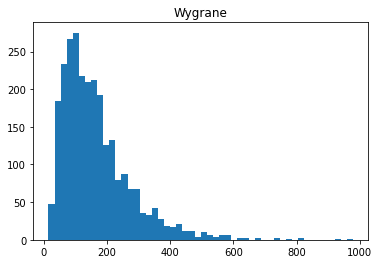

In [157]:
# Ładniejsze wykresy za 2 tygodnie ^^
plt.hist(days[wins], bins=50)
plt.title("Wygrane")

Text(0.5, 1.0, 'Przegrane')

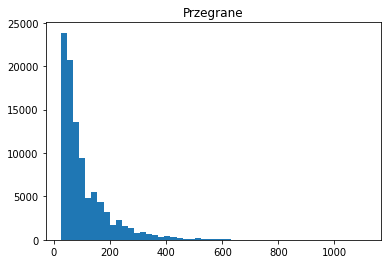

In [158]:
plt.hist(days[~wins], bins=50)
plt.title("Przegrane")

Teraz wykonanie kodu trwało kilka sekund ale co jeżeli potrzebujemy dłuższych symulacji, jak wykorzystać tutaj numbę?

In [159]:
@jit
def simulation2(n):
    days = np.zeros(n)
    wins = np.zeros(n, dtype=np.bool_)  # tutaj trzeba wprowadzić poprawkę, żeby działało
    for i in range(n):
        d = 1
        M = 100
        while True:
            inv1 = 0.1 * M
            inv2 = 0.5 * M
            if np.random.rand() < 0.1:
                M += inv1 * 9
            else:
                M -= inv1
            M += inv2 * 0.02
            if M > 10_000.0:
                days[i] = d
                wins[i] = True
                break
            if M < 10.0:
                days[i] = d
                break
            d += 1
    return days, wins
_ = simulation2(100_000)

In [160]:
%timeit simulation2(n)

788 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Ponad 100 razy krócej...
Potencjalne skrócenie czasu eksperymentu z jednego dnia do 15minut, to dużo!

Ale czy można jeszcze bardziej? Czasem można wykorzystując paralelizm i gpu, zainteresowanych odsyłam [do dokumentacji](https://numba.pydata.org/) i [przykładów](https://numba.pydata.org/numba-doc/latest/user/examples.html). 

## Nie weszło na sprint ale może się przydać...

Oczywiście nie jest to pełny opis możliwości numpy'a, ale warto sprawdzić w razie potrzeb:

- [Widoki vs kopie](https://numpy.org/doc/stable/user/basics.copies.html)
- Operacje inplace, zmieniające array'a
- `np.linalg` - rozkłady macierzy, wartości własne itd.
- `np.fft` - szybka transformata Fouriera
- `np.random` - różne rozkłady oraz generatory liczb losowych
- `np.polynomial` - praca z wielomianami
- `np.histogram` - histogram ale same liczby
- `np.einsum` - **super** sprytne obliczenia na tensorach
- [Praca z plikami](https://numpy.org/doc/stable/user/how-to-io.html)
- [Poradnik dla matlabowców](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

## Do pracy domowej

W przypadku zadania z Monte Carlo zacznij od oszacowania liczby $\pi$ :)

Kilka linków które mogą się przydać:

- https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/
- https://www.youtube.com/watch?v=WAf0rqwAvgg

Poniżej znajdziesz więcej zdań do poćwiczenia.
Odpowiedzi z podpunktów 5 i 9 umieść w google formsie.

Korzystając z następującego array'a:

In [250]:
np.random.seed(1337)
x = np.round(np.random.normal(size=30), 2)
y = x + np.round(np.random.normal(size=30) * 0.1, 2)
x

array([-0.7 , -0.49, -0.32, -1.76,  0.21, -2.01, -0.56,  0.34,  1.55,
       -1.37,  1.43, -0.28, -0.56,  1.19,  1.7 , -1.69, -0.7 ,  0.58,
        0.98, -1.22, -1.33, -0.  , -1.31, -0.38,  1.27,  0.12,  0.15,
       -2.75, -0.36,  0.01])

Wyznacz/policz:

1. Średnią z `x`
2. Sumę `x`
3. Średnią z wartości bezwzględnych z `x`
4. Element najbardziej odległy od $0$ z `x`
5. Element najbardziej odległy od $2$ z `x`
6. Array który ustawi elementy mniejsze od $-1$ na $-1$, a większe od $1$ na $1$
7. Średni błąd między (ERR) `x` i `y`
8. Średni błąd bezwzględny (MAD) między `x` i `y`
9. Średni błąd kwadratowy (MSE) między `x` i `y`
10. Pierwiastek ze średniego błędu kwadratowego (RMSE) między `x` i `y`

Napisz funkcję `standardize(X)`, która unormuje każdą kolumnę macierzy `X` (każdą oddzielnie).
Średnia z każdej kolumny powinna być równa $0$, a odchylenie standardowe równe $1$.
Jest to procedura bardzo często stosowana w MLu.

In [251]:
np.mean(x)

-0.2753333333333333

In [252]:
np.sum(x)

-8.26

In [253]:
np.mean(np.abs(x))

0.9106666666666666

In [254]:
x[np.argmax(np.abs(x-0))]

-2.75

In [255]:
x[np.argmax(np.abs(x-2))]

-2.75

In [256]:
np.where(x>1,1,np.where(x<-1, -1, x))

array([-0.7 , -0.49, -0.32, -1.  ,  0.21, -1.  , -0.56,  0.34,  1.  ,
       -1.  ,  1.  , -0.28, -0.56,  1.  ,  1.  , -1.  , -0.7 ,  0.58,
        0.98, -1.  , -1.  , -0.  , -1.  , -0.38,  1.  ,  0.12,  0.15,
       -1.  , -0.36,  0.01])

In [257]:
np.mean(x-y)

-0.005333333333333344

In [258]:
np.mean(np.abs(x-y))

0.08266666666666665

In [259]:
np.mean((x-y)**2)

0.009780000000000002

In [260]:
np.sqrt(np.mean((x-y)**2)).round(3)

0.099

standarize

In [185]:
test_x = np.random.random(size=(10,5))*np.random.randint(-20, 20,5)

In [222]:
def standarize(X):
    means = np.mean(X, axis=0)
    stdds = np.std(X, axis=0)
    return (X - means) / stdds

In [223]:
ans = standarize(test_x)
ans

array([[ 1.02487273,  0.54879493, -0.60366244,  0.89769154,  0.52678219],
       [ 0.23979578,  1.67621188, -0.88369516, -0.15042237, -1.74485223],
       [ 1.00324514, -0.82888999, -0.59936672,  1.96177927, -1.08500554],
       [-0.16045537, -0.81592475, -1.27281666, -0.02599494,  1.27736925],
       [ 0.68684819, -0.17458587,  0.97151269, -1.40196339, -1.52746707],
       [-0.68077532,  1.77035091, -1.00414447, -1.038745  ,  0.47447805],
       [-1.94763559, -0.83671338, -0.31489026, -1.33583561,  0.27958554],
       [ 0.49160019, -0.57335514,  1.60261918,  0.56812496,  0.74446666],
       [ 0.82744549, -1.10737697,  0.90844659,  0.3902556 ,  0.28007457],
       [-1.48494124,  0.34148839,  1.19599726,  0.13510993,  0.77456858]])

In [227]:
ans[:,0].mean(), ans[:,0].std()

(0.0, 1.0)

Monte Carlo

+ Dla $\pi$:

In [244]:
def sim_mc_pi(n_sim, sq_len=2):
    x, y = np.random.random(n_sim), np.random.random(n_sim)
    x, y = x - 0.5, y - 0.5     # make 0 as center, then range is <-0.5, 0.5>
    x, y = x * sq_len, y * sq_len   # make numbers in range of square
    radius = sq_len / 2     
    n_in_circ = np.sum(np.where(np.sqrt(x**2+y**2)<=radius,1, 0))
    return 4 * n_in_circ / n_sim

In [247]:
sim_mc_pi(10_000_000)

3.1412472

+ dla całki:

In [248]:
from matplotlib import pyplot as plt

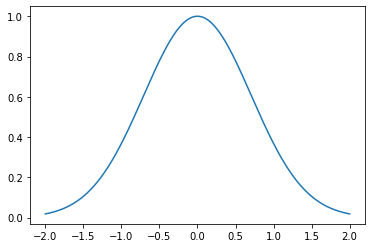

In [249]:
x = np.linspace(-2, 2, 10000)
plt.plot(x, np.exp(-x**2))

In [261]:
def sim_mc_pi(n_sim):
    x, y = np.random.random(n_sim), np.random.random(n_sim)
    x = x - 0.5     # make 0 as center, then range is <-0.5, 0.5>
    x = x * 4   # make numbers in range of square     
    n_in_circ = np.sum(np.where(y <= np.exp(-x**2),1, 0))
    return 4 * n_in_circ / n_sim

In [263]:
sim_mc_pi(10_000_000).round(2)

1.76